# Analysis on All Data Files

On this notebook, I will apply the final model on all five datasets.

## Load Libraries

In [5]:
# Import base libraries
import pandas as pd
import numpy as np
from scipy.io import arff

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.utils import class_weight

from functions import *

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Load Data

There are five data files: 
    * data1, 1year.arff 
    * data2, 2year.arff 
    * data3, 3year.arff
    * data4, 4year.arff
    * data5, 5year.arff

Note: No cleaning applied to data. XGBoost Classifier can handle the missing values and outliers.

In [6]:
# Load all five data files

data1 = arff.loadarff('data/1year.arff')
df1 = pd.DataFrame(data1[0])

data2 = arff.loadarff('data/2year.arff')
df2 = pd.DataFrame(data2[0])

data3 = arff.loadarff('data/3year.arff')
df3 = pd.DataFrame(data3[0])

data4 = arff.loadarff('data/4year.arff')
df4 = pd.DataFrame(data4[0])

data5 = arff.loadarff('data/5year.arff')
df5 = pd.DataFrame(data5[0])

In [7]:
# Convert class/label type to binary

df1['class'] = df1['class'].astype('int64')
df2['class'] = df2['class'].astype('int64')
df3['class'] = df3['class'].astype('int64')
df4['class'] = df4['class'].astype('int64')
df5['class'] = df5['class'].astype('int64')

In [8]:
# Size of datasets

print('Size of datasets')
print("Data 1 (Year1):", len(df1))
print("Data 2 (Year2):", len(df2))
print("Data 3 (Year3):", len(df3))
print("Data 4 (Year4):", len(df4))
print("Data 5 (Year5):", len(df5))

Size of datasets
Data 1 (Year1): 7027
Data 2 (Year2): 10173
Data 3 (Year3): 10503
Data 4 (Year4): 9792
Data 5 (Year5): 5910


## Imbalance Information


In [13]:
# Imbalance info using class_weight.compute_class_weight

print('Class Weights:')

df_list = [df1, df2, df3, df4, df5]

for i, df in enumerate(df_list, start=1):
    class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=[0,1], y=df['class'])
    ratio = class_weights[1]/class_weights[0]
    sqrt_ratio = np.sqrt(class_weights[1]/class_weights[0])
    print(f'Data {i}: Ratio={round(ratio,3)}, sqrt(ratio)={round(sqrt_ratio,3)}, class_weights={class_weights}')
    
# The values are very similar for train/test/whole datasets.
# Training weights are used for data training.

Class Weights:
Data 1: Ratio=24.93, sqrt(ratio)=4.993, class_weights=[ 0.52005625 12.96494465]
Data 2: Ratio=24.432, sqrt(ratio)=4.943, class_weights=[ 0.52046455 12.71625   ]
Data 3: Ratio=20.218, sqrt(ratio)=4.496, class_weights=[ 0.52473022 10.60909091]
Data 4: Ratio=18.014, sqrt(ratio)=4.244, class_weights=[0.52775682 9.50679612]
Data 5: Ratio=13.415, sqrt(ratio)=3.663, class_weights=[0.53727273 7.20731707]


In [14]:
# Imbalance info using class value_counts

print('Imbalance Ratio, based on class value_counts:')

df_list = [df1, df2, df3, df4, df5]

for i, df in enumerate(df_list, start=1):
    val_counts = df['class'].value_counts()
    ratio= val_counts[0]/val_counts[1]
    sqrt_ratio= np.sqrt(val_counts[0]/val_counts[1])
    print(f'Data {i}: Ratio={round(ratio,3)}, sqrt(ratio)={round(sqrt_ratio,3)}')
    
# The values are very similar for train/test/whole datasets.

Imbalance Ratio, based on class value_counts:
Data 1: Ratio=24.93, sqrt(ratio)=4.993
Data 2: Ratio=24.432, sqrt(ratio)=4.943
Data 3: Ratio=20.218, sqrt(ratio)=4.496
Data 4: Ratio=18.014, sqrt(ratio)=4.244
Data 5: Ratio=13.415, sqrt(ratio)=3.663


## Compare Model 7, 9, 10 Performance on All Datasets

------model_9------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.9610,1.0000,0.9800,0.998,1.0000
Data 1,Test,0.7190,0.8040,0.7590,0.982,0.9570
Data 2,Train,0.8410,1.0000,0.9140,0.992,1.0000
Data 2,Test,0.4830,0.6060,0.5380,0.964,0.9210
Data 3,Train,0.7190,1.0000,0.8360,0.982,1.0000
Data 3,Test,0.5540,0.7200,0.6260,0.956,0.9160
Data 4,Train,0.7440,1.0000,0.8530,0.982,1.0000
Data 4,Test,0.4960,0.6600,0.5670,0.947,0.9420
Data 5,Train,0.9500,1.0000,0.9740,0.996,1.0000


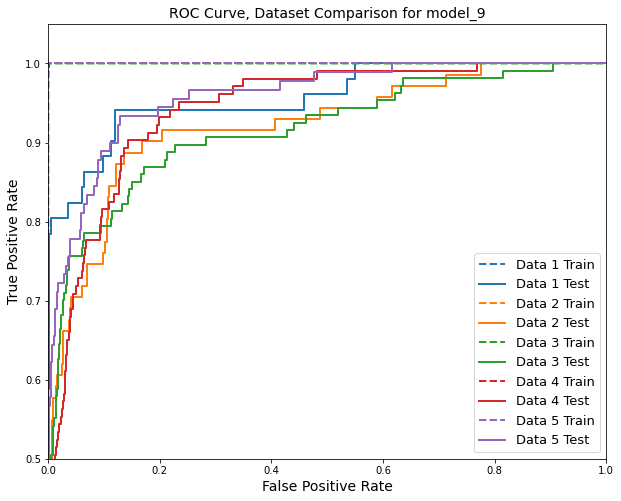

In [5]:
# Final Model (Model 9), max_depth=4

xgbParams_m9 = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1  
}

df_list = [df1, df2, df3, df4, df5]
#df_list = [df1, df2]

model_9_df = compare_datafiles_perf(df_list, xgbParams_m9, 'model_9', 1, 1, 1)
model_9_df

------model_7------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.8700,1.0000,0.9300,0.9940,1.0000
Data 1,Test,0.6410,0.8040,0.7130,0.9770,0.9610
Data 2,Train,0.8750,1.0000,0.9330,0.9940,1.0000
Data 2,Test,0.5060,0.6200,0.5570,0.9660,0.9280
Data 3,Train,0.7710,1.0000,0.8710,0.9860,1.0000
Data 3,Test,0.5350,0.7200,0.6140,0.9540,0.9230
Data 4,Train,0.8060,1.0000,0.8930,0.9870,1.0000
Data 4,Test,0.5560,0.6800,0.6110,0.9550,0.9490
Data 5,Train,0.8290,1.0000,0.9070,0.9860,1.0000


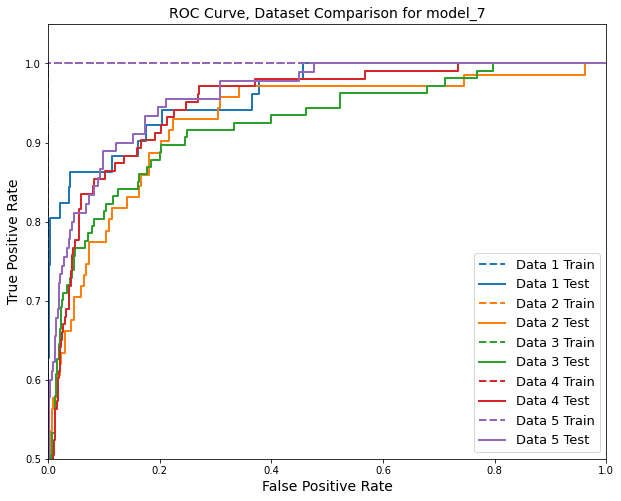

In [6]:
# Model 7, max_depth=5

xgbParams_m7 = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    'reg_alpha': 5,
    'subsample': 1,
    'colsample_bytree': 0.7
}

df_list = [df1, df2, df3, df4, df5]

model_7_df = compare_datafiles_perf(df_list, xgbParams_m7, 'model_7', 1, 1, 1)
model_7_df

------model_10------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.9730,1.0000,0.9870,0.9990,1.000
Data 1,Test,0.7140,0.7840,0.7480,0.9810,0.951
Data 2,Train,0.9620,1.0000,0.9810,0.9980,1.000
Data 2,Test,0.6340,0.6340,0.6340,0.9740,0.909
Data 3,Train,0.9000,1.0000,0.9470,0.9950,1.000
Data 3,Test,0.6360,0.7010,0.6670,0.9640,0.931
Data 4,Train,0.8980,1.0000,0.9460,0.9940,1.000
Data 4,Test,0.5640,0.6410,0.6000,0.9550,0.948
Data 5,Train,0.9700,1.0000,0.9850,0.9980,1.000


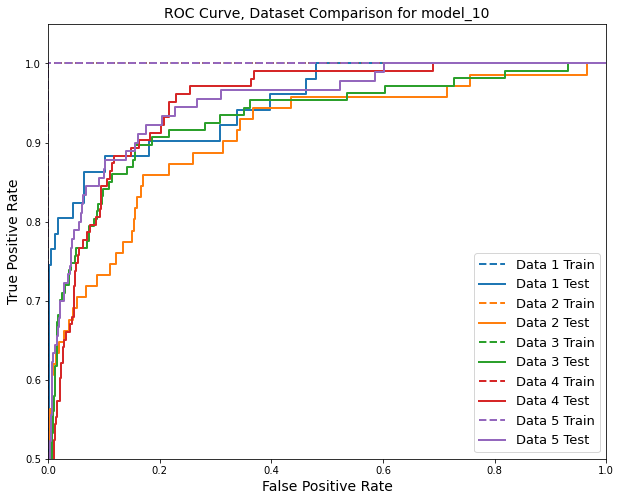

In [7]:
# Model 10, max_depth=6

xgbParams_m10 = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 80, 
    'max_depth': 6,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.25,
    'max_delta_step': 4,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1,
}

df_list = [df1, df2, df3, df4, df5]

model_10_df = compare_datafiles_perf(df_list, xgbParams_m10, 'model_10', 1, 1, 1)
model_10_df

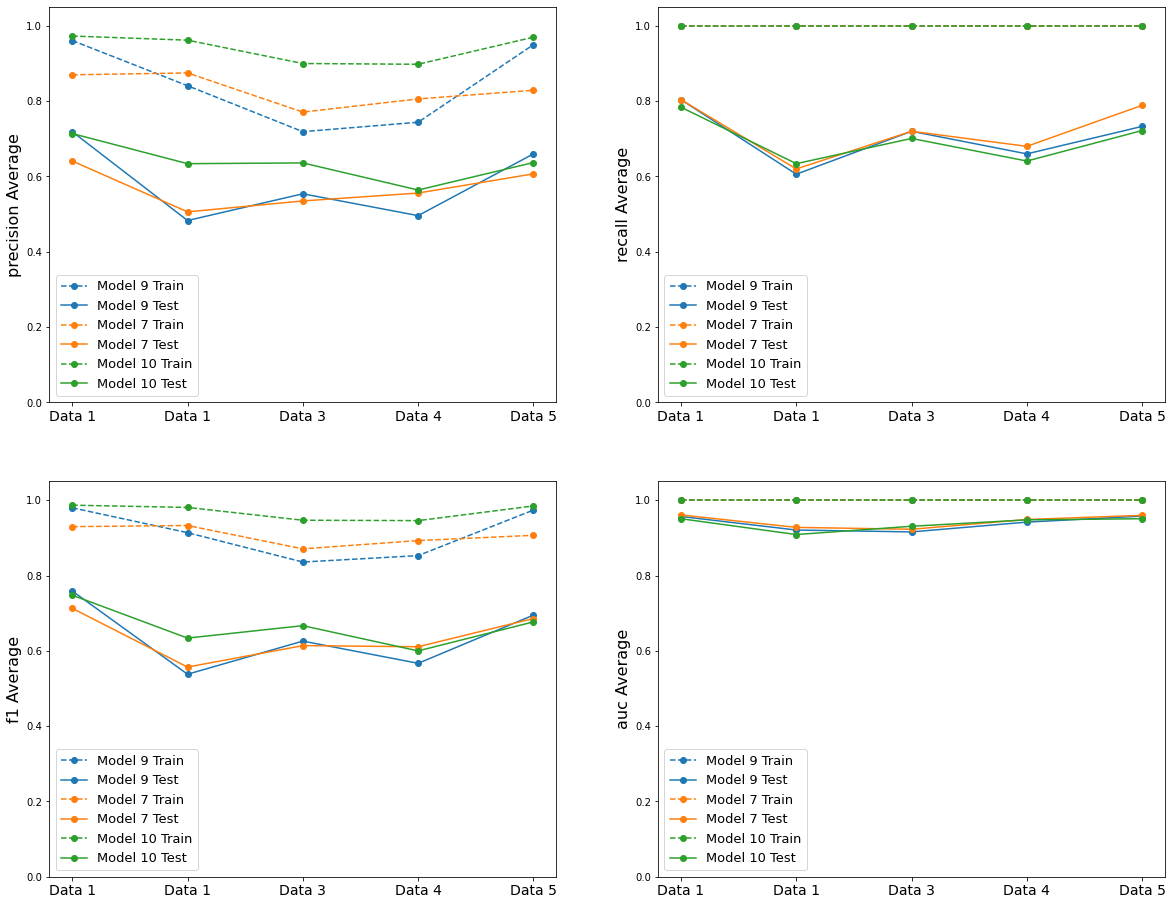

In [8]:
model_df_list = [model_9_df, model_7_df, model_10_df]

model_names_list = ['Model 9', 'Model 7', 'Model 10']

plot_compare_model_metricsAvg(model_df_list, model_names_list)

### Comments

Model 9 (max_depth=4):
    * Previously Selected performance for data 3
    * Overfitting is least on Data 3

Model 7 (max_depth=5):
    * Performance is similar to Model 9
    * More smooth performance on all datasets

Model 10 (max_depth=6):
    * Highest metrics
    * But overfitting is sligtly larger
    
Selected model: Model 7

## Some Tuning and Comparing

In [9]:
# sample_weight only, no scale_pos_weight

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    #'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1  
}

df_list = [df1, df2, df3, df4, df5]

model_noSpw_df = compare_datafiles_perf(df_list, xgbParams, 'noSpw', 1, 0, 0)
model_noSpw_df


------noSpw------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.9780,1.0000,0.9890,0.9990,1.0000
Data 1,Test,0.8700,0.7840,0.8250,0.9880,0.9680
Data 2,Train,0.9450,1.0000,0.9720,0.9980,1.0000
Data 2,Test,0.6830,0.5770,0.6260,0.9760,0.9360
Data 3,Train,0.8840,1.0000,0.9380,0.9940,1.0000
Data 3,Test,0.7000,0.6540,0.6760,0.9680,0.9310
Data 4,Train,0.9260,1.0000,0.9610,0.9960,1.0000
Data 4,Test,0.6090,0.5150,0.5580,0.9570,0.9450
Data 5,Train,0.9730,1.0000,0.9860,0.9980,1.0000


In [10]:
#n_estimators=100

xgbParams_11 = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 1,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1  
}

df_list = [df1, df2, df3, df4, df5]

model_nEst100_df = compare_datafiles_perf(df_list, xgbParams_11, 'nEst100', 1, 0, 0)
model_nEst100_df

------nEst100------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.8980,1.0000,0.946,0.9960,1.000
Data 1,Test,0.6610,0.8040,0.726,0.9780,0.957
Data 2,Train,0.6730,1.0000,0.804,0.9800,1.000
Data 2,Test,0.4020,0.6620,0.500,0.9540,0.925
Data 3,Train,0.6090,1.0000,0.757,0.9700,1.000
Data 3,Test,0.4910,0.7480,0.593,0.9480,0.916
Data 4,Train,0.6250,1.0000,0.769,0.9680,1.000
Data 4,Test,0.4270,0.6800,0.524,0.9350,0.938
Data 5,Train,0.8420,1.0000,0.914,0.9870,1.000


In [11]:
# reg_lambda=5

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 125, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 5,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1  
}

df_list = [df1, df2, df3, df4, df5]

model_lambda5_df = compare_datafiles_perf(df_list, xgbParams, 'lambda5', 1, 0, 0)
model_lambda5_df

------lambda5------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.9170,1.0000,0.9570,0.9960,1.000
Data 1,Test,0.7320,0.8040,0.7660,0.9820,0.968
Data 2,Train,0.7950,1.0000,0.8860,0.9900,1.000
Data 2,Test,0.4730,0.6200,0.5370,0.9630,0.940
Data 3,Train,0.6470,1.0000,0.7850,0.9750,1.000
Data 3,Test,0.5070,0.7200,0.5950,0.9500,0.924
Data 4,Train,0.7330,1.0000,0.8460,0.9810,1.000
Data 4,Test,0.5220,0.6890,0.5940,0.9500,0.952
Data 5,Train,0.8600,1.0000,0.9250,0.9890,1.000


In [12]:
#n_estimators=100
# reg_lambda=5

xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 4.5,
    'n_estimators': 100, 
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 5,
    'reg_alpha': 0,
    'subsample': 1,
    'colsample_bytree': 1  
}

df_list = [df1, df2, df3, df4, df5]

model_nEst100_lambda5_df = compare_datafiles_perf(df_list, xgbParams, 'nEst100_lambda5', 1, 0, 0)
model_nEst100_lambda5_df

------nEst100_lambda5------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.8430,1.0000,0.9150,0.9930,1.000
Data 1,Test,0.6360,0.8240,0.7180,0.9770,0.967
Data 2,Train,0.6630,1.0000,0.7980,0.9790,1.000
Data 2,Test,0.4380,0.6900,0.5360,0.9580,0.935
Data 3,Train,0.5390,1.0000,0.7000,0.9600,1.000
Data 3,Test,0.4180,0.7570,0.5380,0.9340,0.920
Data 4,Train,0.6000,1.0000,0.7500,0.9650,1.000
Data 4,Test,0.4420,0.6990,0.5410,0.9380,0.947
Data 5,Train,0.7860,1.0000,0.8800,0.9820,1.000


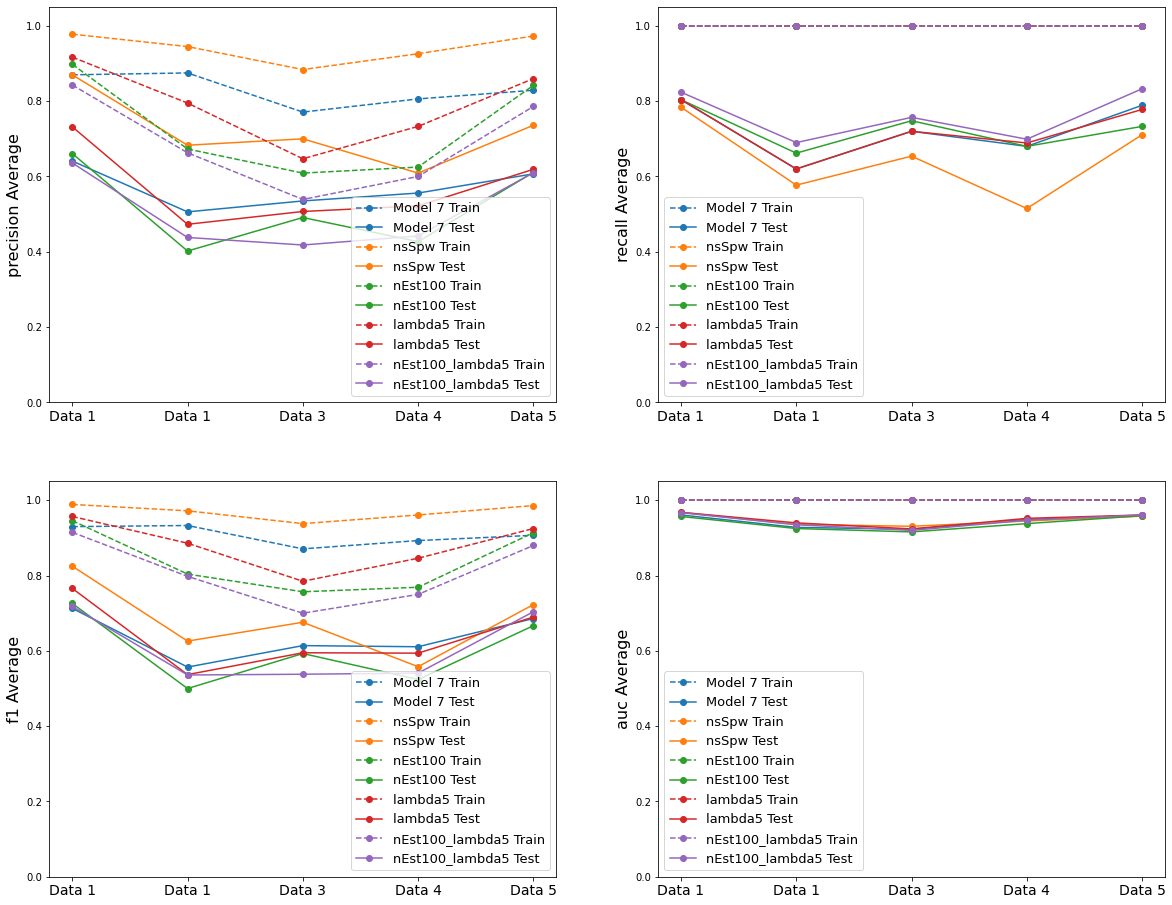

In [29]:
model_df_list2 = [model_7_df, model_noSpw_df, model_nEst100_df, model_lambda5_df, model_nEst100_lambda5_df]

model_names_list2 = ['Model 7', 'nsSpw', 'nEst100', 'lambda5', 'nEst100_lambda5']

plot_compare_model_metricsAvg(model_df_list2, model_names_list2)

### Comments

After some tuning, still best performance is Model 7.

## Final Model

Model 7 has the best performance.

------final_model------
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


,Sample,precision,recall,f1,accuracy,auc
Data,,,,,,
Data 1,Train,0.8700,1.0000,0.9300,0.9940,1.0000
Data 1,Test,0.6410,0.8040,0.7130,0.9770,0.9610
Data 2,Train,0.8750,1.0000,0.9330,0.9940,1.0000
Data 2,Test,0.5060,0.6200,0.5570,0.9660,0.9280
Data 3,Train,0.7710,1.0000,0.8710,0.9860,1.0000
Data 3,Test,0.5350,0.7200,0.6140,0.9540,0.9230
Data 4,Train,0.8060,1.0000,0.8930,0.9870,1.0000
Data 4,Test,0.5560,0.6800,0.6110,0.9550,0.9490
Data 5,Train,0.8290,1.0000,0.9070,0.9860,1.0000


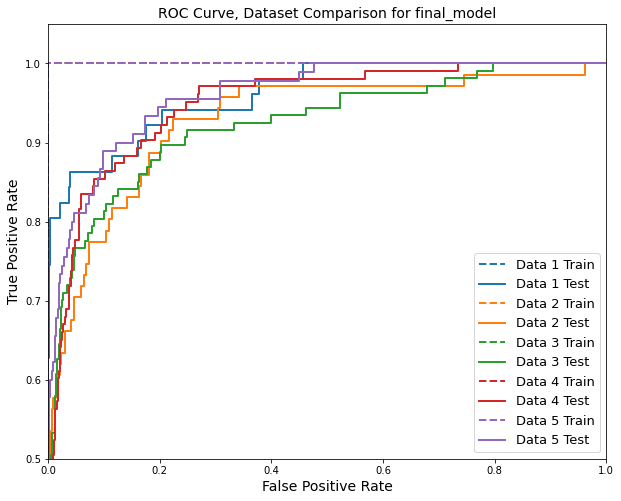

In [31]:
# Final Model
# Model 7, max_depth=5

xgbParams_final = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    'reg_alpha': 5,
    'subsample': 1,
    'colsample_bytree': 0.7
}

df_list = [df1, df2, df3, df4, df5]

final_model_df = compare_datafiles_perf(df_list, xgbParams_final, 'final_model', 1, 1, 1)
final_model_df

In [9]:
#Create final models

xgbParams_final = {
    'eval_metric': 'logloss', 
    'random_state': 42,
    'scale_pos_weight': 20,
    'n_estimators': 125, 
    'max_depth': 5,
    'min_child_weight': 3,
    'gamma': 0,
    'learning_rate': 0.20,
    'max_delta_step': 0,
    'reg_lambda': 0,
    'reg_alpha': 5,
    'subsample': 1,
    'colsample_bytree': 0.7
}

d1_final_model = xgb_model_report2(1, df1, xgbParams_final, 'final_model', 1, 0, 0)
d2_final_model = xgb_model_report2(2, df2, xgbParams_final, 'final_model', 1, 0, 0)
d3_final_model = xgb_model_report2(3, df1, xgbParams_final, 'final_model', 1, 0, 0)
d4_final_model = xgb_model_report2(4, df1, xgbParams_final, 'final_model', 1, 0, 0)
d5_final_model = xgb_model_report2(5, df1, xgbParams_final, 'final_model', 1, 0, 0)

Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!
Sample weights are used!


### Best Predictor Atttributes

In [10]:
# List important attitudes

final_model_list = [d1_final_model, d2_final_model, d3_final_model, d4_final_model, d5_final_model]

df_important_Attr = pd.DataFrame()
cols = df1.columns

for i,df in enumerate(final_model_list, start=1):
    importance = df.feature_importances_
    attribute_importance = pd.DataFrame([cols, importance], index=['Attribute', 'Importance']).T
    attribute_importance.sort_values(by='Importance', ascending=False, inplace=True, ignore_index=True)
    df_important_Attr[f'Data{i}'] = attribute_importance['Attribute'][0:20]

df_important_Attr

,Data1,Data2,Data3,Data4,Data5
0,Attr6,Attr34,Attr6,Attr6,Attr6
1,Attr34,Attr59,Attr34,Attr34,Attr34
2,Attr22,Attr10,Attr22,Attr22,Attr22
3,Attr24,Attr5,Attr24,Attr24,Attr24
4,Attr27,Attr7,Attr27,Attr27,Attr27
5,Attr8,Attr26,Attr8,Attr8,Attr8
6,Attr25,Attr27,Attr25,Attr25,Attr25
7,Attr1,Attr11,Attr1,Attr1,Attr1
8,Attr49,Attr15,Attr49,Attr49,Attr49
9,Attr45,Attr25,Attr45,Attr45,Attr45


In [12]:
#Common Best predictors

set1 = set(df_important_Attr['Data1'])
set2 = set(df_important_Attr['Data2'])
set3 = set(df_important_Attr['Data3'])
set4 = set(df_important_Attr['Data4'])
set5 = set(df_important_Attr['Data5'])

important_attr_common = set.intersection(set1, set2, set3, set4, set5)
important_attr_common

{'Attr13',
 'Attr22',
 'Attr24',
 'Attr25',
 'Attr27',
 'Attr34',
 'Attr42',
 'Attr5',
 'Attr59'}

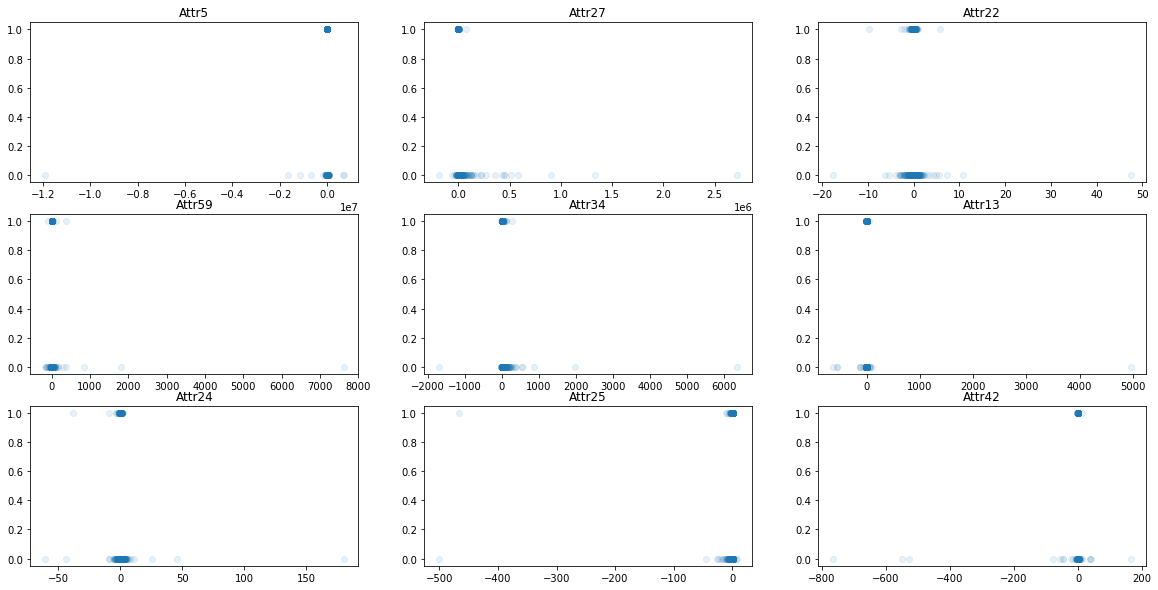

<Figure size 432x288 with 0 Axes>

In [19]:
# Scatter Graphs, Data 3

plt.figure(figsize=(20, 10)) 

for i, col in enumerate(important_attr_common, start=1):
    plt.subplot(3, 3, i)
    plt.scatter(df3[col], df3['class'], alpha=0.1)
    plt.title(col)

plt.show()
plt.savefig('figures/scatter_d3_importantAttr.png')

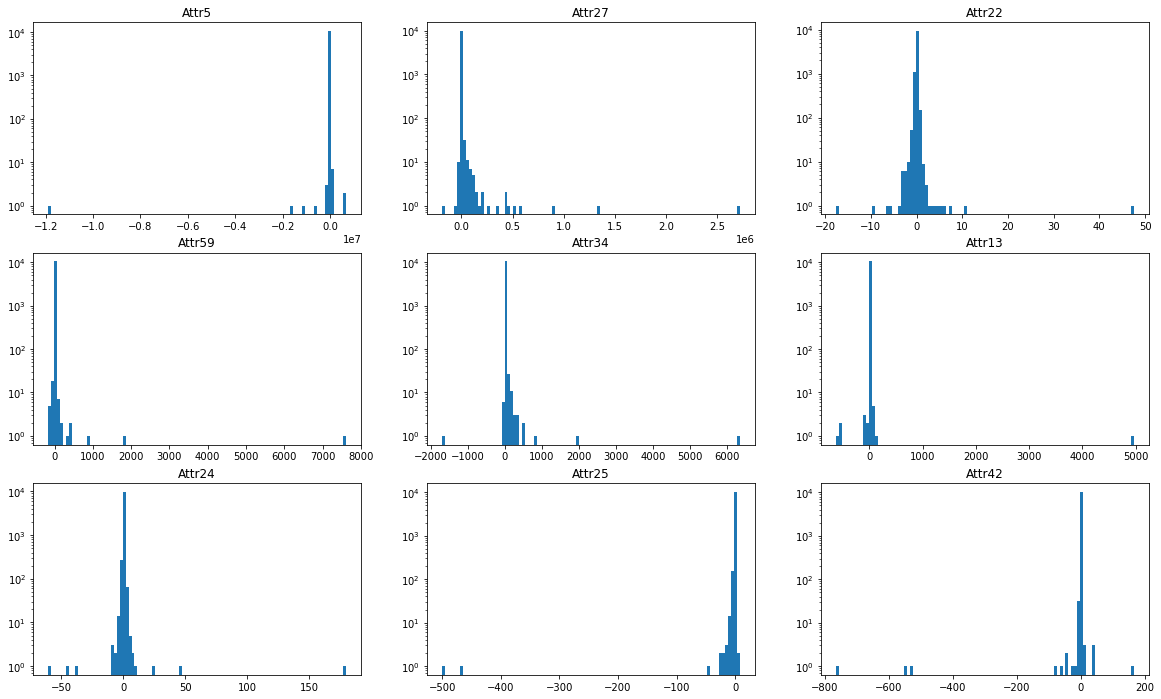

<Figure size 432x288 with 0 Axes>

In [21]:
# Histograms

plt.figure(figsize=(20, 12)) 

for i, col in enumerate(important_attr_common, start=1):
    plt.subplot(3, 3, i)
    plt.hist(df3[col], bins=100, log=True)
    plt.title(col)
    
plt.show()
plt.savefig('figures/hist_d3_log_importantAttr.png')

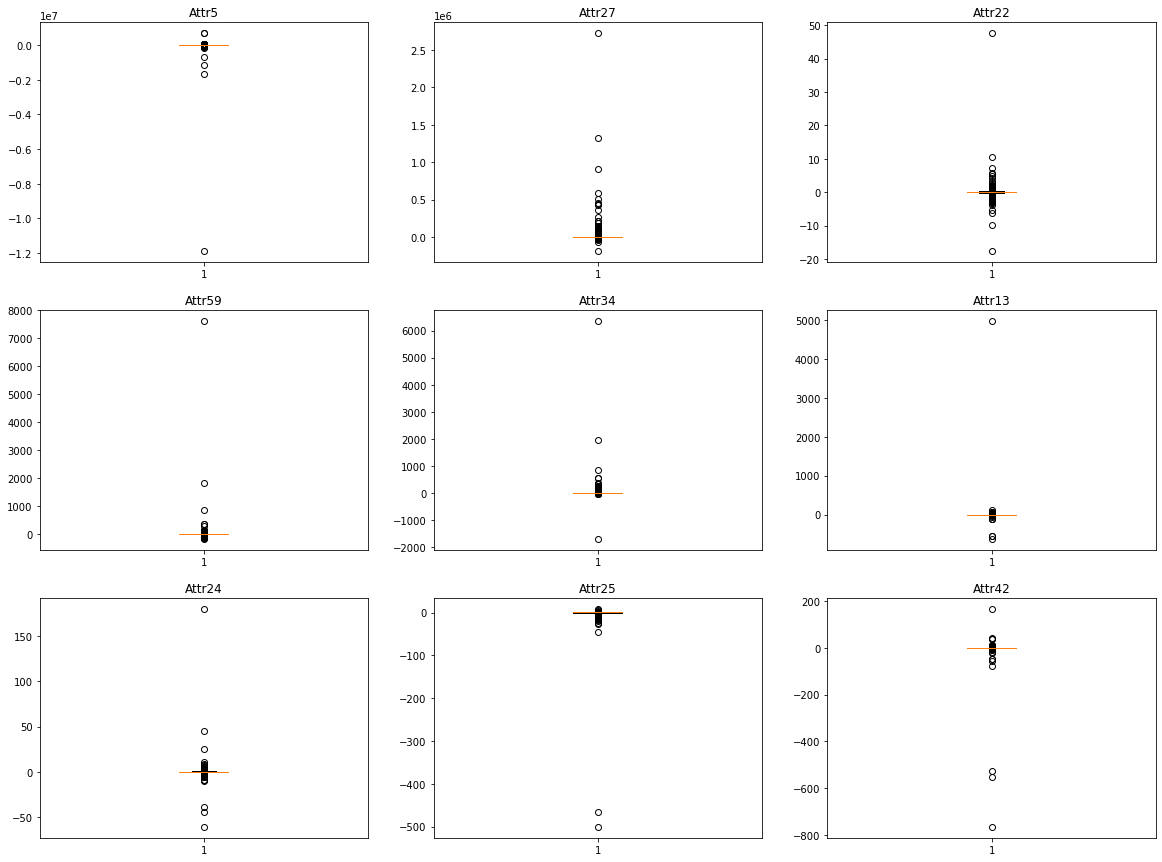

In [22]:
# Box plots

plt.figure(figsize=(20, 15)) 

for i, col in enumerate(important_attr_common, start=1):
    plt.subplot(3, 3, i)
    plt.boxplot(df3[col].dropna()) 
    plt.title(col)

plt.savefig('figures/boxPlot_d3_importantAttr.png')

## Boxplot only draws the attribute only when missing entries removed.

## Interpret

5-year Period (Data 1):
    * Model successfully identifies the 80.4 of the true bankrupt companies, which will bankrupt 5 years later. (recall)
    * Among the model predicted bankruptcy companies, 64.1% of them are true bankrupt companies, which will bankrupt 5 years later. (precision)
    * The Harmonic Mean of Precision and Recall (f1-score) is 71.3%.
    
4-year Period (Data 2):
    * Model successfully identifies the 62.0 of the true bankrupt companies, which will bankrupt 4 years later. (recall)
    * Among the model predicted bankruptcy companies, 50.6% of them are true bankrupt companies, which will bankrupt 4 years later. (precision)
    * The Harmonic Mean of Precision and Recall (f1-score) is 55.7%.
    
3-year Period (Data 3):
    * Model successfully identifies the 72.0 of the true bankrupt companies, which will bankrupt 3 years later. (recall)
    * Among the model predicted bankruptcy companies, 53.5% of them are true bankrupt companies, which will bankrupt 3 years later. (precision)
    * The Harmonic Mean of Precision and Recall (f1-score) is 61.4%.

2-year Period (Data 4):
    * Model successfully identifies the 68.0 of the true bankrupt companies, which will bankrupt 2 years later. (recall)
    * Among the model predicted bankruptcy companies, 55.6% of them are true bankrupt companies, which will bankrupt 2 years later. (precision)
    * The Harmonic Mean of Precision and Recall (f1-score) is 61.1%.
    
1-year Period (Data 5):
    * Model successfully identifies the 78.9 of the true bankrupt companies, which will bankrupt 1 years later. (recall)
    * Among the model predicted bankruptcy companies, 60.7% of them are true bankrupt companies, which will bankrupt 1 years later. (precision)
    * The Harmonic Mean of Precision and Recall (f1-score) is 68.6%.

On Average:
    * Model successfully identifies the 72.3 of the true bankrupt companies. (recall)
    * Among the model predicted bankruptcy companies, 56.9% of them are true bankrupt companies. (precision)
    * The Harmonic Mean of Precision and Recall (f1-score) is 63.6%.
    
**Best common predictors**

* X13 (gross profit + depreciation) / sales
* X22 profit on operating activities / total assets
* X24 gross profit (in 3 years) / total assets
* X25 (equity - share capital) / total assets
* X27 profit on operating activities / financial expenses
* X34 operating expenses / total liabilities
* X42 profit on operating activities / sales
* X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
* X59 long-term liabilities / equity
 

## Future Work

* The model performance is not very good and overfitting is large. Search for alternative methods to improve performance.

* Each dataset can be optimized (with parameter tuning) seperately and create 5 different models, instead of one model. This will increase the overall performance.